# Problem Statement:

The objective of this project is to create models around a best fitting line. This will help predict continous values i.e. estimated insurance cost.
Based on all past information like age, gender, bmi etc, this project attempts to build a model which will predict how much a particular individual will pay for insurance.

### This is a regression problem.
The task is to predict the "Response" variable for each Id in the test set. 

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install matplotlib
# !pip install seaborn

In [3]:
# ! pip install -U scikit-learn scipy matplotlib

## Loading the dataset

In [4]:
df = pd.read_csv("insurance1.csv")

In [5]:
# first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
# datatypes of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Unique/distinct values in every categorical feature column
columns=df.columns
columns

for col in columns:
    print(col)
    print(df[col].unique())

age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
sex
['female' 'male']
bmi
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34

## Treating Outliers

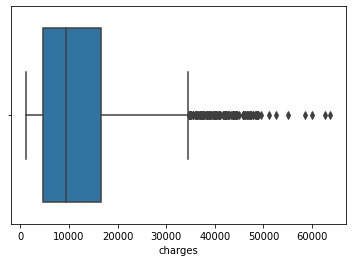

In [9]:
sns.boxplot(data = df,x="charges") 
plt.show()

In [10]:
Q1 = np.percentile(df['charges'],25)
Q3 = np.percentile(df['charges'],75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Fence = Q1 - 1.5 * IQR
Upper_Fence = Q3 + 1.5 * IQR
print('LF:', Lower_Fence, 'UF:', Upper_Fence) 

4740.28715
16639.912515
11899.625365
LF: -13109.1508975 UF: 34489.350562499996


In [11]:
df[df['charges'] > 23956.791175]

,age,sex,bmi,children,smoker,region,charges
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1308,25,female,30.200,0,yes,southwest,33900.65300
1313,19,female,34.700,2,yes,southwest,36397.57600
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


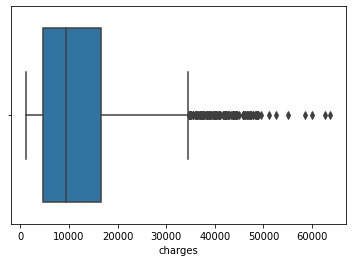

In [12]:
df.drop(df[df['charges'] > 18400].index, inplace = True)
sns.boxplot(data = df,x="charges") 
plt.show()

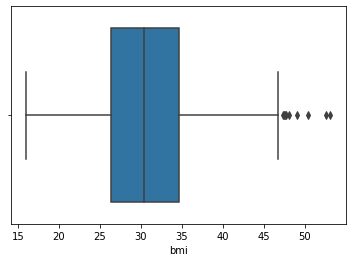

In [13]:
sns.boxplot(data = df,x="bmi") 
plt.show()

In [14]:
df[df['bmi'] > 45.5].index
# df.drop(df[df['bmi'] > 45.5].index, inplace = True)

Int64Index([ 116,  286,  292,  401,  438,  454,  543,  547,  549,  660,  847,
             860,  930,  941, 1047, 1088, 1131, 1317],
           dtype='int64')

## Visualizing distributions

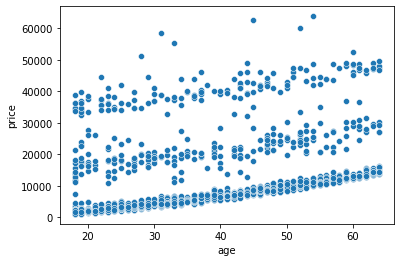

In [60]:
sns.scatterplot(data = df,x="age",y="charges")
plt.xlabel("age")
plt.ylabel("price")
plt.show()

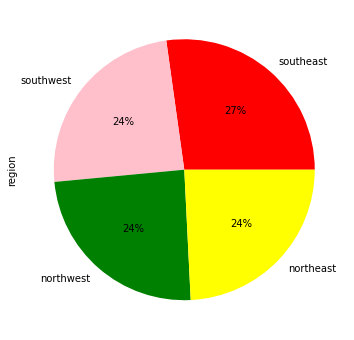

In [16]:
# Region distribution
plt.figure(figsize=(6,6))
df["region"].value_counts().plot(kind="pie",autopct="%d%%",
                                
                                     colors=["red","pink","green",'yellow'])
plt.show()

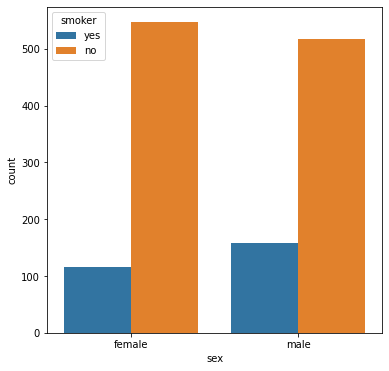

In [17]:
# smokers with respect to sex
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="sex",hue="smoker")
plt.show()

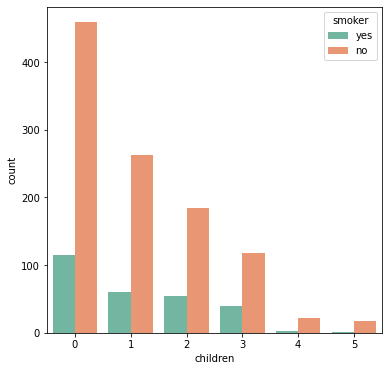

In [18]:
# smoker patterns using countplot
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="children",hue="smoker",palette="Set2")
plt.show()

## Encoding Categorical Values

In [19]:
#1. LabelEncoder
#LabelEncoder() inbuilt method of pandas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])  #convert value from object to
#numeric type 

In [20]:
df[df['smoker']==1].head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
11,62,0,26.29,0,1,2,27808.7251
14,27,1,42.13,0,1,2,39611.7577
19,30,1,35.30,0,1,3,36837.4670
23,34,0,31.92,1,1,0,37701.8768


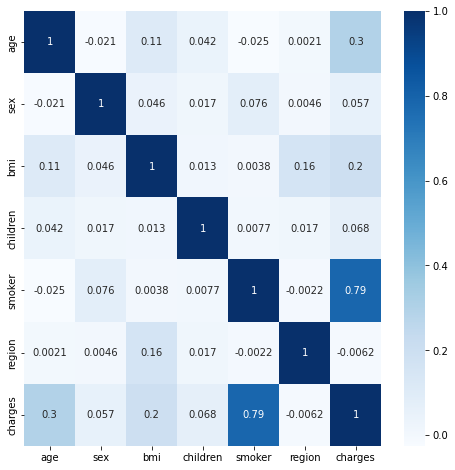

In [21]:
# Correlation
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

In [22]:
# check for null values
df.isnull().sum() #isnull() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

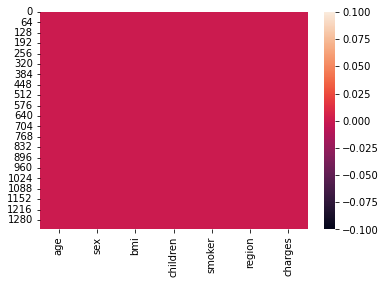

In [23]:
sns.heatmap(df.isnull())
plt.show()

In [24]:
# Skewness and histogram
for col in columns:
    print("Skewness of Column {} : {}".format(col,df[col].skew()))  

Skewness of Column age : 0.05567251565299186
Skewness of Column sex : -0.02095139743334541
Skewness of Column bmi : 0.2840471105987448
Skewness of Column children : 0.9383804401702414
Skewness of Column smoker : 1.4647661601953743
Skewness of Column region : -0.038100508026419524
Skewness of Column charges : 1.5158796580240388


Skewness of Column age : 0.05567251565299186
Histogram :  age


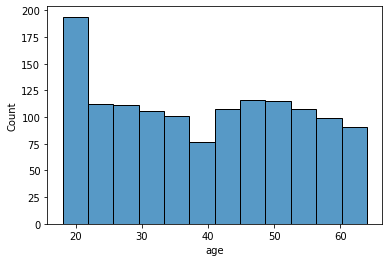

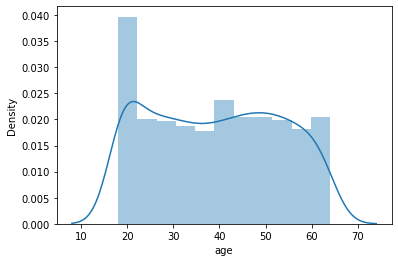

Skewness of Column sex : -0.02095139743334541
Histogram :  sex


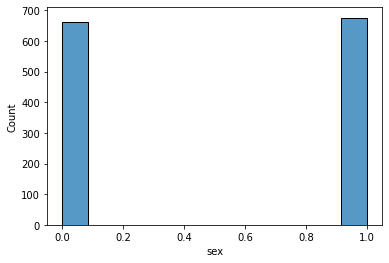

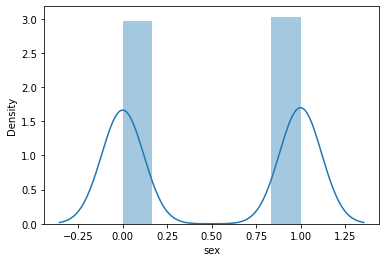

Skewness of Column bmi : 0.2840471105987448
Histogram :  bmi


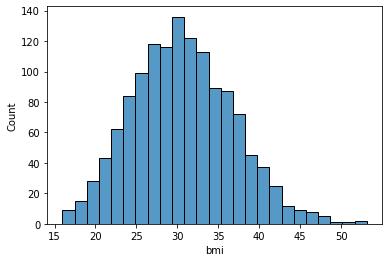

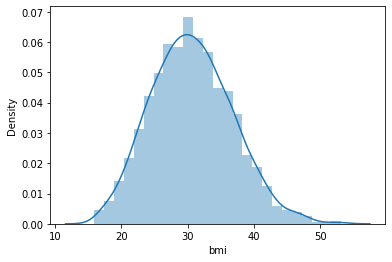

Skewness of Column children : 0.9383804401702414
Histogram :  children


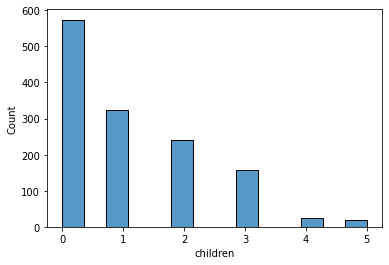

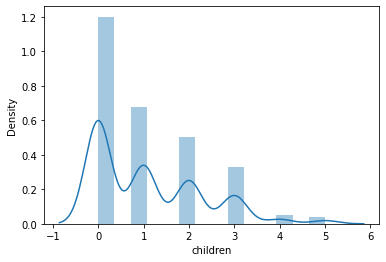

Skewness of Column smoker : 1.4647661601953743
Histogram :  smoker


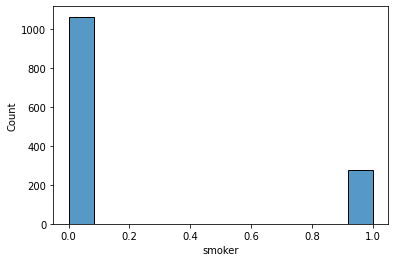

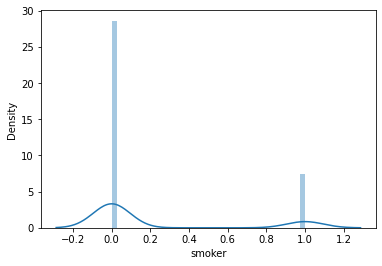

Skewness of Column region : -0.038100508026419524
Histogram :  region


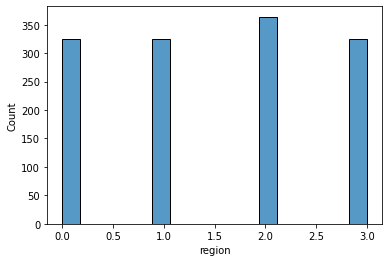

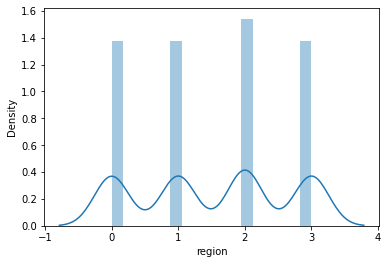

Skewness of Column charges : 1.5158796580240388
Histogram :  charges


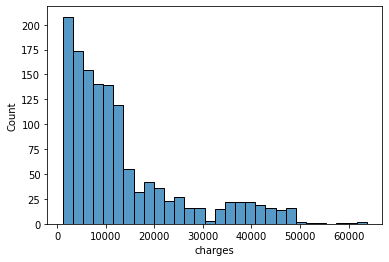

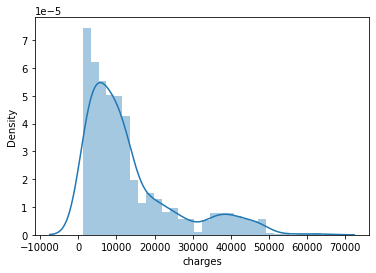

In [25]:
for col in columns:
    print("Skewness of Column {} : {}".format(col,df[col].skew()))
    print("Histogram : ",col)
    sns.histplot(df[col])
    plt.show()
    sns.distplot(df[col])
    plt.show()

## Split dataset into input and output variables

In [26]:
X = df.drop(['charges'], axis =1)
Y = df['charges']

In [27]:
# !pip install statsmodels

In [28]:
# variance_inflation_factor
# It quantifies the severity of multicollinearity in an ordinary least squares regression analysis.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X = df[columns]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

    feature        VIF
0       age   7.551348
1       sex   2.001061
2       bmi  10.371829
3  children   1.801245
4    smoker   1.256837
5    region   2.924528


In [29]:
# implement train test split
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=1)

In [30]:
X_test.shape

(402, 6)

In [31]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()

# X_train = ss.fit_transform(X_train)
# X_test  = ss.transform(X_test)
# X_train

## Implement Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
m = lr.coef_
print("Slope m: ", m)

Slope m:  [  261.62568984   109.64719595   344.54483066   424.37016596
 23620.80252148  -326.46262527]


In [34]:
b = lr.intercept_
print('Intercept value', b)

Intercept -12364.391322279243


In [63]:
#Y_pred= m*X_test+b
Y_pred = lr.predict(X_test) 
Y_pred[0:30]

array([8.93142116e+03, 7.07090670e+03, 3.69370805e+04, 9.59699214e+03,
       2.70083549e+04, 1.08664849e+04, 3.74610217e+01, 1.72228092e+04,
       9.18308115e+02, 1.13965537e+04, 2.79154456e+04, 9.53381323e+03,
       5.18928014e+03, 3.86124990e+04, 4.05094490e+04, 3.72748566e+04,
       1.53562559e+04, 3.59449407e+04, 9.10631783e+03, 3.14429410e+04,
       3.66298253e+03, 1.00966745e+04, 2.21091896e+03, 7.10598084e+03,
       1.13521417e+04, 1.30231210e+04, 1.44472857e+04, 6.12031303e+03,
       9.94564893e+03, 2.18617424e+03])

In [36]:
# show mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred) # formula sum(Y-Y_pred)^2/N

33805466.898688614

In [37]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.7694415927057693

In [38]:
lr.predict([[22, 0, 24, 1,0,0]])

array([2084.81995596])

In [39]:
# Error residuals
residuals = Y_test-Y_pred
residuals

764      163.647086
887    -1798.730903
890    -7606.097346
1293    -295.098594
259     6741.936929
           ...     
701    -6591.856068
672    -2344.105928
1163     134.627358
1103   -3334.514924
1295    1962.041765
Name: charges, Length: 402, dtype: float64

In [40]:
# Error residuals / predicted values
dic = {'residuals':residuals}
df1 = pd.DataFrame.from_dict(dic)
df1['Predicted_output'] = Y_pred
df1.head()

,residuals,Predicted_output
764,163.647086,8931.421164
887,-1798.730903,7070.906703
890,-7606.097346,36937.080496
1293,-295.098594,9596.992144
259,6741.936929,27008.354871


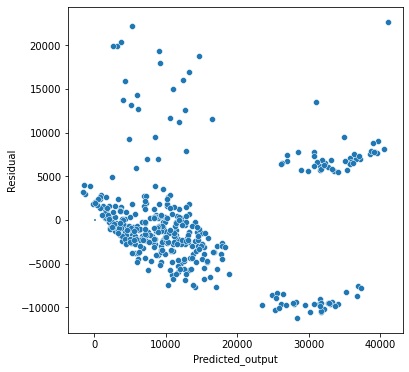

In [42]:
# Error residuals / predicted values plotted
plt.figure(figsize = (6,6))
sns.scatterplot(data=df1,x="Predicted_output",y='residuals') # variance in the residuals or errors should be constant
plt.hlines(0,0,150)
plt.ylabel("Residual")
plt.show()

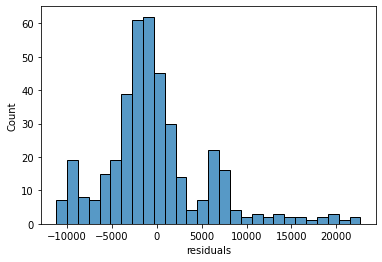

In [43]:
sns.histplot(df1['residuals'])
plt.show()

In [44]:
df1['residuals'].skew()

1.1257853613655637

## Regularization (Lasso regression)

In [45]:
# Lasso regression means L1 call inbuilt class Lasso
from sklearn.linear_model import Lasso
l1 = Lasso(1000)

l1.fit(X_train,Y_train)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
# check slope/coefficient of value of each input add the error on training
# time : use coef_ method of Lasso
m1 = l1.coef_
for i in m1:
    print("Slope m: ", np.round(i,2))

Slope m:  252.28
Slope m:  0.0
Slope m:  305.92
Slope m:  0.0
Slope m:  17576.52
Slope m:  -0.0


In [47]:
l1.score(X_test, Y_test)

0.7184260929064418

In [48]:
#Lasso regularization with different lambda values
for i in range(200,1001,50): # start = 200, stop = 1001-1 = 1000 step = 50
    # create the object of Lasso class
    l1 = Lasso(i)  # first put the value of i = 200, then i =250,300 ... 1000
    #RSS + i*sum(abs(all coef))
    l1.fit(X_train,Y_train)   # train model from Lasso
    score = l1.score(X_test, Y_test)  #find out the score means testing 30% data
    print("Value of Lambda: ",i,"Test Score", score)

Value of Lambda:  200 Test Score 0.7657206391211261
Value of Lambda:  250 Test Score 0.7641197096446235
Value of Lambda:  300 Test Score 0.762278102787976
Value of Lambda:  350 Test Score 0.7601963312317407
Value of Lambda:  400 Test Score 0.7579337015515684
Value of Lambda:  450 Test Score 0.7556504777862578
Value of Lambda:  500 Test Score 0.7531523693581793
Value of Lambda:  550 Test Score 0.7504393762673329
Value of Lambda:  600 Test Score 0.7475114985137186
Value of Lambda:  650 Test Score 0.7443687360973362
Value of Lambda:  700 Test Score 0.7410725986200387
Value of Lambda:  750 Test Score 0.7378054379066359
Value of Lambda:  800 Test Score 0.7343353726333752
Value of Lambda:  850 Test Score 0.7306624028002565
Value of Lambda:  900 Test Score 0.7267865144010861
Value of Lambda:  950 Test Score 0.7227077734875597
Value of Lambda:  1000 Test Score 0.7184260929064418


In [49]:
from sklearn.model_selection import cross_val_score
#cross_val_score inbuilt class
#create the object  of Lasso class and pass value of alpha or lambda
l1 = Lasso(200)
l1_cross = cross_val_score(l1,X,Y,cv=4) # here l1 object of Lasso and 
#X input and Y output cv means divided the no. of parts of data=4
l1_cross # four testing data scores
l1_cross.mean()

0.7444332586817883

## Ridge regression

In [50]:
#Ridge regularization with different lambda values

from sklearn.linear_model import Ridge
for i in range(51): # start = 0, stop = 51-1 = 50 step = 5
    # create the object of Ridge class
    l2 = Ridge(i)  # first put the value of i = 200, then i =0,5 ... 50
    #RSS + i*sum(square(all coef))
    l2.fit(X_train,Y_train)   # train model from ridge
    score = l2.score(X_test, Y_test)
    score2 = l2.score(X_train, Y_train)#find out the score means testing 30% data
    print("Value of Lambda:",i,"Test Score", score,"Train Score", score2)

Value of Lambda: 0 Test Score 0.7694415927057693 Train Score 0.7422571320172101
Value of Lambda: 1 Test Score 0.7692081844141473 Train Score 0.7422309925783954
Value of Lambda: 2 Test Score 0.7689287587131886 Train Score 0.7421539153734711
Value of Lambda: 3 Test Score 0.7686051276377269 Train Score 0.7420278543225471
Value of Lambda: 4 Test Score 0.7682390337207035 Train Score 0.7418546889541484
Value of Lambda: 5 Test Score 0.7678321529242093 Train Score 0.7416362275327061
Value of Lambda: 6 Test Score 0.7673860974325228 Train Score 0.7413742100390299
Value of Lambda: 7 Test Score 0.7669024183143742 Train Score 0.741070311011453
Value of Lambda: 8 Test Score 0.7663826080612448 Train Score 0.7407261422548985
Value of Lambda: 9 Test Score 0.7658281030081204 Train Score 0.7403432554247025
Value of Lambda: 10 Test Score 0.7652402856427529 Train Score 0.7399231444916318
Value of Lambda: 11 Test Score 0.7646204868091336 Train Score 0.7394672480941782
Value of Lambda: 12 Test Score 0.763969

In [51]:
from sklearn.model_selection import cross_val_score
#cross_val_score inbuilt class
#create the object  of Lasso class and pass value of alpha or lambda
r1 = Ridge(0)
r1_cross = cross_val_score(r1,X,Y,cv=4) # here l1 object of Lasso and 
#X input and Y output cv means divided the no. of parts of data=4
r1_cross # four testing data scores
r1_cross.mean()

0.7465374465214439

In [52]:
r1 = Ridge(0)
r1.fit(X_train,Y_train)   # train model from ridge
score = r1.score(X_test, Y_test)
score2 = r1.score(X_train, Y_train)

In [53]:
# pickling to store Ridge model
import pickle
pickle.dump(r1,open('r1.pkl','wb'))

In [54]:
model = pickle.load(open('r1.pkl', 'rb'))
print("model loaded")

model loaded


In [55]:
r1.predict([[22,0,24,1,1,0]])

array([25705.62247745])

In [56]:
def create_model(model):
    model.fit(X_train,Y_train)#train the model
    Y_pred=model.predict(X_test) #test
    score = model.score(X_test, Y_test)
    print(score)
    score2 = model.score(X_train, Y_train)
    print(score2)
    return model

## xgboost implementation

In [57]:
# !pip install xgboost
from xgboost import XGBRegressor
xgc = XGBRegressor(n_estimators = 16, reg_alpha = 4)
xgc = create_model(xgc)

Y_pred=xgc.predict(X_test)
# print("\nAccuracy of our xgboost model is:",accuracy_score(Y_test,Y_pred))
# print("Recall value of our model is:", recall_score(Y_test,Y_pred))

0.8600536323413535
0.9380666951642633


In [58]:
# !pip install scikit-learn --upgrade